# Exploratory Data Analysis (EDA) for Stock Sentiment Analysis

This notebook performs exploratory data analysis on the cleaned financial news dataset.  
We will examine headline lengths, publisher activity, publication trends, and perform basic text analysis to understand the data before moving to sentiment and correlation analysis.

# Environment Setup

In [1]:
import os
import sys

# Add the project root directory to the Python path for module imports
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_loader import load_data
from scripts.preprocess import preprocess_data

# Load and Process Data

2025-05-30 23:21:16,286 - src.data_loader - INFO - Loading data from ../data/processed/clean_analyst_ratings.csv
2025-05-30 23:21:19,717 - src.data_loader - INFO - Successfully loaded 55987 rows of data
2025-05-30 23:21:19,720 - scripts.preprocess - INFO - Starting data preprocessing
2025-05-30 23:21:19,877 - scripts.preprocess - INFO - Successfully parsed date column to datetime


count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64


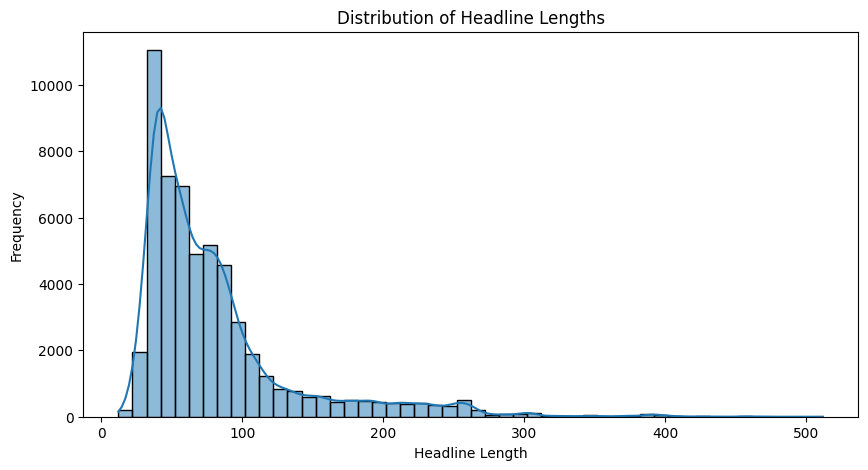

publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64


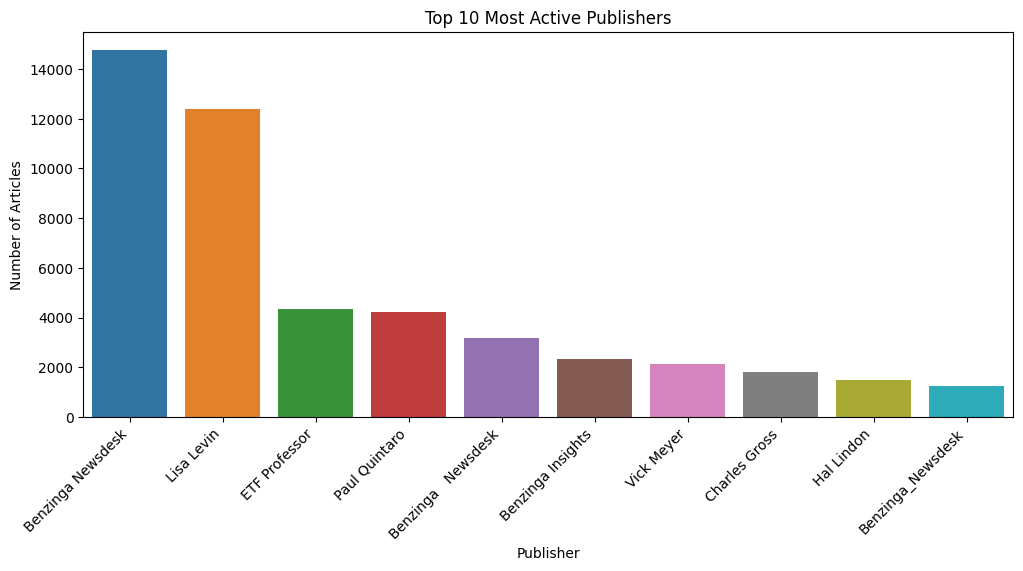

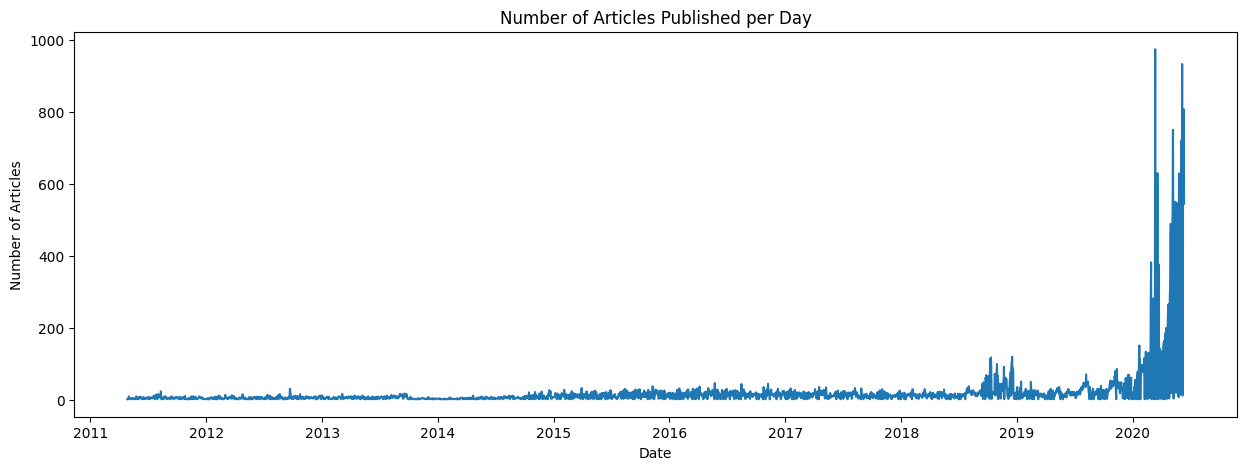

2025-05-30 23:21:23,345 - scripts.preprocess - INFO - Data preprocessing completed successfully


In [3]:
# Load the cleaned data
df = load_data("../data/processed/clean_analyst_ratings.csv")

# Preprocess the data (standardizes columns, parses dates, handles missing values)
df_clean = preprocess_data(df)

## Descriptive Statistics: Headline Length

In this step, we calculate and visualize the length of each news headline. This helps us understand the typical size of headlines and whether there are outliers or unusual patterns.

count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64


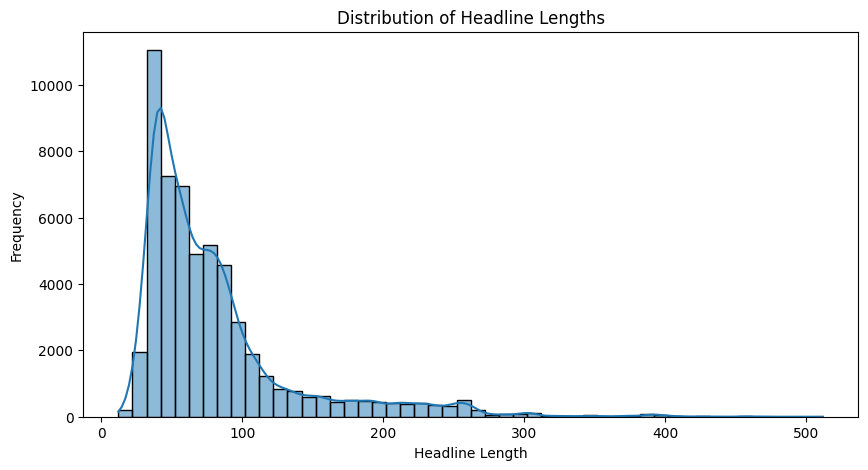

In [10]:
# Calculate headline lengths
df_clean['headline_length'] = df_clean['headline'].str.len()

# Show basic statistics
print(df_clean['headline_length'].describe())

# Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_clean['headline_length'], bins=50, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

## Descriptive Statistics: Articles per Publisher

Here, we count the number of articles published by each publisher. This helps us identify the most active publishers in the dataset.

Top 10 publishers:
 publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64


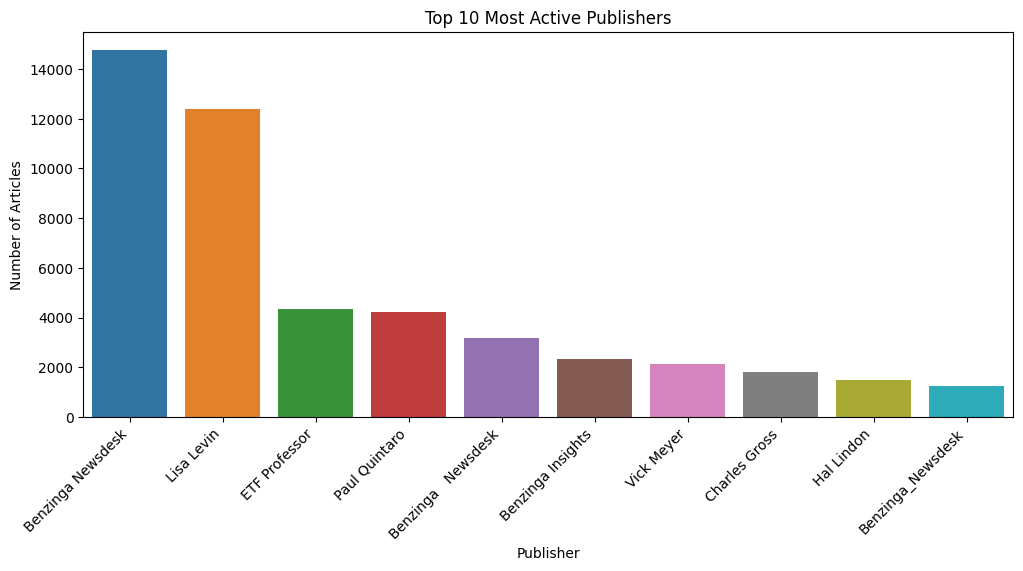

In [11]:
publisher_counts = df_clean['publisher'].value_counts()
print("Top 10 publishers:\n", publisher_counts.head(10))

plt.figure(figsize=(12, 5))
sns.barplot(x=publisher_counts.head(10).index, y=publisher_counts.head(10).values)
plt.title('Top 10 Most Active Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.show()

## Descriptive Statistics: Publication Date Trends

We analyze the number of articles published over time to identify trends, spikes, or periods of increased news activity.

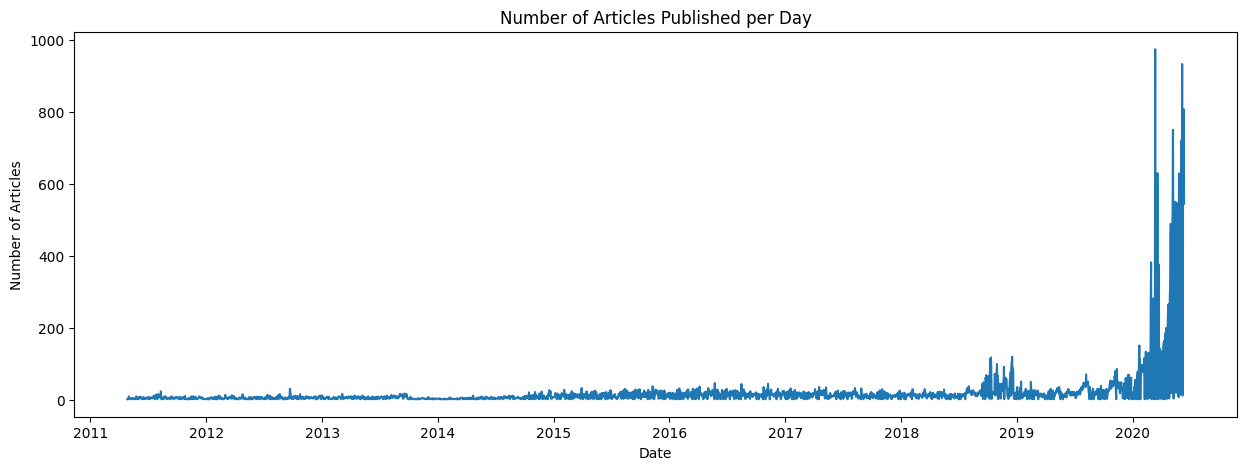

In [12]:
df_clean['date'] = pd.to_datetime(df_clean['date'])
daily_counts = df_clean.groupby(df_clean['date'].dt.date).size()

plt.figure(figsize=(15, 5))
daily_counts.plot()
plt.title('Number of Articles Published per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

## Text Analysis: Top Keywords in Headlines

In this step, we use natural language processing (NLP) to extract and visualize the most common keywords in news headlines. This helps us identify major topics and recurring themes in the news data.

[nltk_data] Downloading package punkt to /home/dinki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dinki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


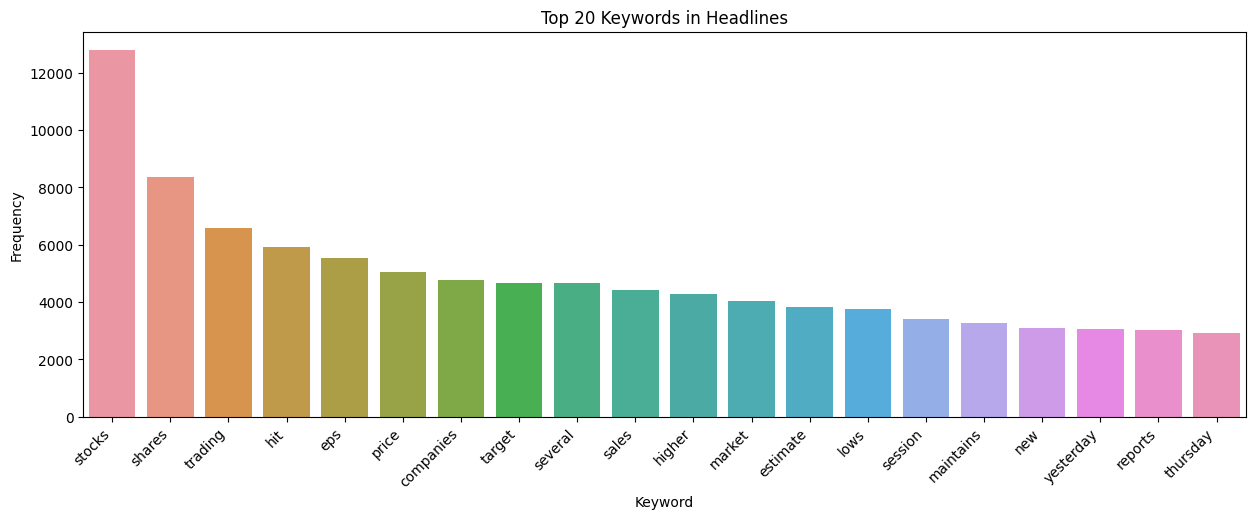

In [13]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources if not already present
nltk.download('punkt')
nltk.download('stopwords')

class HeadlineTextAnalyzer:
    def __init__(self, headlines):
        self.headlines = headlines
        self.stop_words = set(stopwords.words('english'))

    def extract_keywords(self, text):
        tokens = word_tokenize(text.lower())
        return [word for word in tokens if word.isalnum() and word not in self.stop_words and len(word) > 2]

    def get_top_keywords(self, n=20):
        all_keywords = []
        for headline in self.headlines:
            all_keywords.extend(self.extract_keywords(headline))
        keyword_freq = Counter(all_keywords).most_common(n)
        return keyword_freq

# Instantiate and use the analyzer
analyzer = HeadlineTextAnalyzer(df_clean['headline'])
top_keywords = analyzer.get_top_keywords(20)
keywords, frequencies = zip(*top_keywords)

plt.figure(figsize=(15, 5))
sns.barplot(x=list(keywords), y=list(frequencies))
plt.title('Top 20 Keywords in Headlines')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

## Time Series Analysis: Publication Frequency Over Time

We analyze how the frequency of article publication varies over time. This can reveal spikes in news activity related to specific market events.

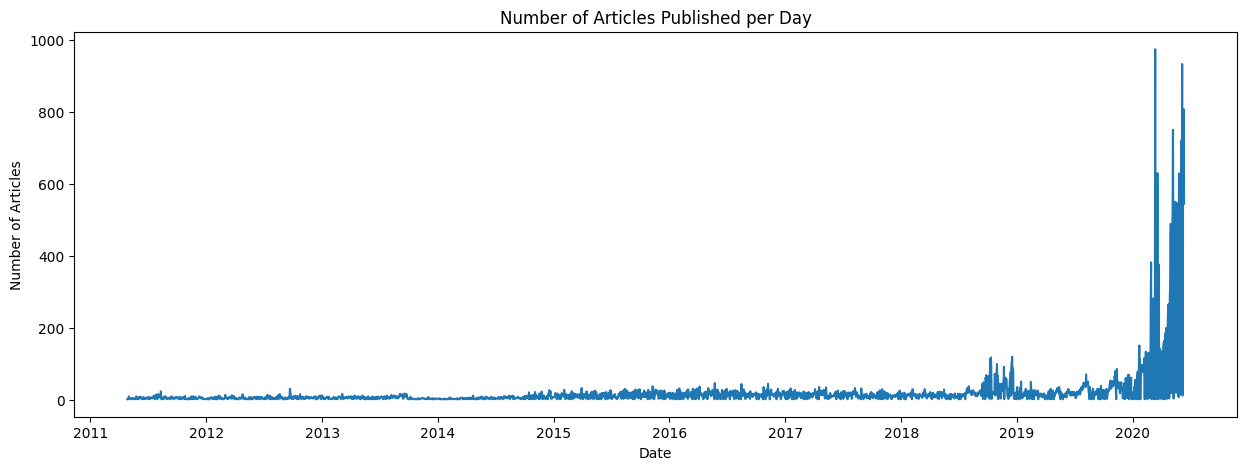

In [14]:
class PublicationTimeSeriesAnalyzer:
    def __init__(self, df):
        self.df = df

    def plot_daily_counts(self):
        daily_counts = self.df.groupby(self.df['date'].dt.date).size()
        plt.figure(figsize=(15, 5))
        daily_counts.plot()
        plt.title('Number of Articles Published per Day')
        plt.xlabel('Date')
        plt.ylabel('Number of Articles')
        plt.show()

    def plot_hourly_distribution(self):
        self.df['hour'] = self.df['date'].dt.hour
        plt.figure(figsize=(10, 5))
        sns.histplot(self.df['hour'], bins=24, kde=False)
        plt.title('Distribution of Publication Hours')
        plt.xlabel('Hour of Day')
        plt.ylabel('Number of Articles')
        plt.show()

# Instantiate and use the time series analyzer
ts_analyzer = PublicationTimeSeriesAnalyzer(df_clean)
ts_analyzer.plot_daily_counts()

## Time Series Analysis: Publishing Times

We analyze the distribution of article publication times throughout the day. This can be crucial for traders and automated trading systems to identify when most news is released.

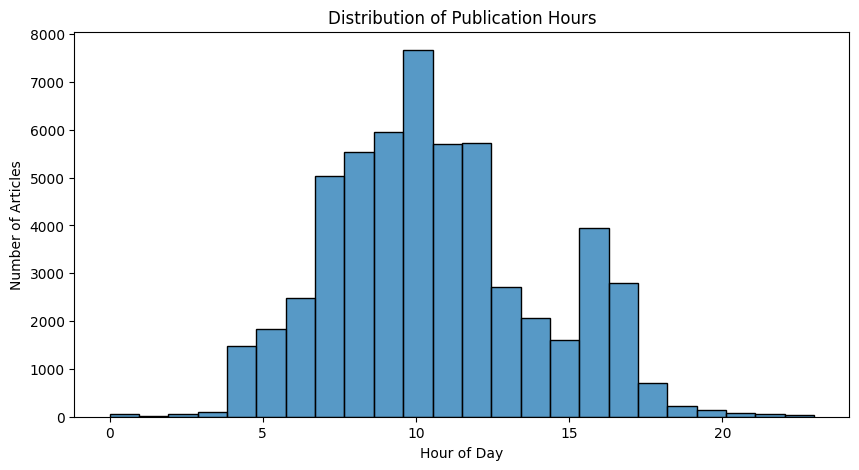

In [15]:
ts_analyzer.plot_hourly_distribution()

## Publisher Analysis: Publisher Types and Domains

We further analyze publishers to see if there are differences in the type of news they report. If publisher names are email addresses, we extract and count unique domains to see which organizations contribute most frequently.

In [8]:
import re

class PublisherAnalyzer:
    def __init__(self, publishers):
        self.publishers = publishers

    def get_email_domains(self):
        # Extract domains from email-like publisher names
        email_pattern = re.compile(r'@([\\w\\.-]+)')
        domains = self.publishers[self.publishers.str.contains('@', na=False)].apply(
            lambda x: email_pattern.search(x).group(1) if email_pattern.search(x) else None
        )
        domain_counts = domains.value_counts()
        return domain_counts

    def plot_top_domains(self, n=10):
        domain_counts = self.get_email_domains()
        if not domain_counts.empty:
            plt.figure(figsize=(12, 5))
            sns.barplot(x=domain_counts.head(n).index, y=domain_counts.head(n).values)
            plt.title('Top Email Domains Among Publishers')
            plt.xlabel('Domain')
            plt.ylabel('Number of Articles')
            plt.xticks(rotation=45, ha='right')
            plt.show()
        else:
            print('No email domains found in publisher names.')

# Instantiate and use the publisher analyzer
publisher_analyzer = PublisherAnalyzer(df_clean['publisher'])
publisher_analyzer.plot_top_domains()

No email domains found in publisher names.


# Identify major market events


In [5]:
# Identify major market events
market_events = {
    'date': ['2023-01-15', '2023-02-01'],  # Example dates
    'event': ['Fed Rate Decision', 'Earnings Season']
}
market_events_df = pd.DataFrame(market_events)
market_events_df['date'] = pd.to_datetime(market_events_df['date'])

# Analyze news frequency around these events
window_days = 3  # Days before and after event
for _, event in market_events_df.iterrows():
    mask = (df_clean['date'] >= event['date'] - pd.Timedelta(days=window_days)) & \
           (df_clean['date'] <= event['date'] + pd.Timedelta(days=window_days))
    event_period_news = df_clean[mask]
    print(f"News articles around {event['event']}: {len(event_period_news)}")

News articles around Fed Rate Decision: 0
News articles around Earnings Season: 0


# Create categories based on keywords


<Figure size 1500x800 with 0 Axes>

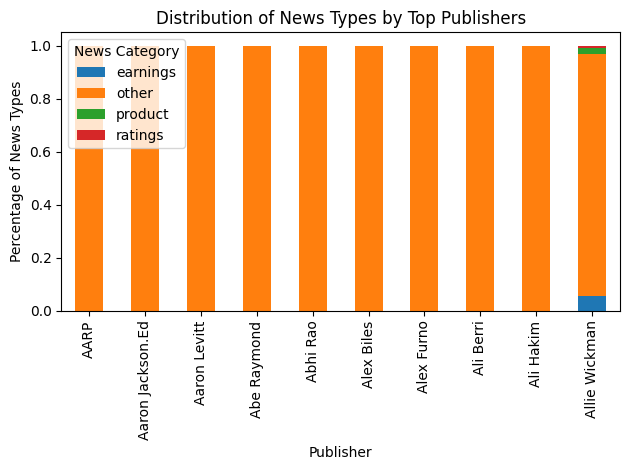

In [6]:
# Create categories based on keywords
categories = {
    'earnings': ['earnings', 'revenue', 'profit'],
    'ratings': ['upgrade', 'downgrade', 'rating'],
    'product': ['launch', 'release', 'announcement']
}

def categorize_news(headline):
    headline_lower = headline.lower()
    for category, keywords in categories.items():
        if any(keyword in headline_lower for keyword in keywords):
            return category
    return 'other'

df_clean['news_category'] = df_clean['headline'].apply(categorize_news)

# Analyze distribution of news types by publisher
publisher_categories = pd.crosstab(df_clean['publisher'], df_clean['news_category'])
publisher_categories_pct = publisher_categories.div(publisher_categories.sum(axis=1), axis=0)

# Visualize
plt.figure(figsize=(15, 8))
publisher_categories_pct.head(10).plot(kind='bar', stacked=True)
plt.title('Distribution of News Types by Top Publishers')
plt.xlabel('Publisher')
plt.ylabel('Percentage of News Types')
plt.legend(title='News Category')
plt.tight_layout()
plt.show()